In [102]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open(r'/Users/jamesliao2018/Pictures/Camera2019/DSC_0001.JPG')   #读取图片文件
# plt.imshow(image)
# plt.show()            #将图片输出到屏幕


In [79]:
tmp_div = image.split()

In [80]:
array0 = np.array(tmp_div[0])

In [81]:
array0.shape

(4000, 6000)

In [82]:
array0

array([[72, 74, 72, ..., 22, 22, 21],
       [72, 75, 73, ..., 20, 19, 18],
       [72, 75, 74, ..., 19, 18, 17],
       ...,
       [14, 13, 12, ..., 22, 24, 25],
       [13, 13, 12, ..., 23, 25, 27],
       [13, 14, 13, ..., 26, 26, 28]], dtype=uint8)

In [83]:
# x方向的Prewitt算子
suanzi_x = np.array([[-1, 0, 1],
                    [ -1, 0, 1],
                    [ -1, 0, 1]])


In [84]:
# y方向的Prewitt算子
suanzi_y = np.array([[-1,-1,-1],
                     [ 0, 0, 0],
                     [ 1, 1, 1]])

In [85]:
valH, valW = array0.shape

In [86]:
array0[1:3,1:3]

array([[75, 73],
       [75, 74]], dtype=uint8)

In [87]:
# dict_df = {}
list_arr0 = []
for val_i in range(valH-3):
    tmp_list = []
    for val_j in range(valW-3):
#         tmp_col = list_col[val_j:val_j+3]
        tmp_arr = array0[val_i:val_i+3,val_j:val_j+3]
        tmp_entry = np.sum(tmp_arr*suanzi_y)
        tmp_list.append(tmp_entry)
#         print(tmp_df)
    list_arr0.append(tmp_list)

In [92]:
arr_create0 = np.array(list_arr0)

In [93]:
arr_create0.shape

(3997, 5997)

In [101]:
# plt.imshow(arr_create0)

In [95]:

from scipy import misc
misc.imsave('arr_finger_x.jpg', arr_create0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
np.array([[1,2],[3,4]])

array([[1, 2],
       [3, 4]])

In [98]:
# tmp_div[0]

In [99]:
# tmp_div[1]

In [100]:
# tmp_div[2]

In [23]:

image_arr = np.array(image)      #将图片以数组的形式读入变量
# print (image_arr)


In [24]:
len(image_arr)

4000

In [25]:
image_arr.shape

(4000, 6000, 3)

In [26]:

# from scipy import misc
# misc.imsave('out.jpg', image_arr)

In [27]:
image_arr[0].shape

(6000, 3)

In [31]:
image_arr[0][0]

array([11,  6, 13], dtype=uint8)

In [17]:
arr_t = [1,0,1]

In [29]:
arr2 = image_arr*arr_t

In [30]:
arr2[0][0]

array([11,  0, 13])

In [34]:
arr2.shape

(4000, 6000, 3)

In [35]:
# for i in range(image_arr.shape[0]):
#     for j in range(image_arr.shape[1]):
#         image_arr[i][j]=image_arr[i][j]*arr_t

In [37]:
# plt.imshow(image_arr)
# plt.imshow(arr2)

In [38]:
r,g,b = image_arr.split(); #rgb 通道分离

AttributeError: 'numpy.ndarray' object has no attribute 'split'

In [39]:
import numpy as np
from PIL import Image

def imconv(image_array,suanzi):
    '''计算卷积
        参数
        image_array 原灰度图像矩阵
        suanzi      算子
        返回
        原图像与算子卷积后的结果矩阵
    '''
    image = image_array.copy()     # 原图像矩阵的深拷贝
    
    dim1,dim2 = image.shape

    # 对每个元素与算子进行乘积再求和(忽略最外圈边框像素)
    for i in range(1,dim1-1):
        for j in range(1,dim2-1):
            image[i,j] = (image_array[(i-1):(i+2),(j-1):(j+2)]*suanzi).sum()
    
    # 由于卷积后灰度值不一定在0-255之间，统一化成0-255
    image = image*(255.0/image.max())

    # 返回结果矩阵
    return image

NameError: name 'cm' is not defined

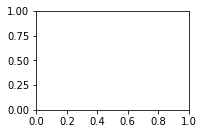

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# x方向的Prewitt算子
suanzi_x = np.array([[-1, 0, 1],
                    [ -1, 0, 1],
                    [ -1, 0, 1]])

# y方向的Prewitt算子
suanzi_y = np.array([[-1,-1,-1],
                     [ 0, 0, 0],
                     [ 1, 1, 1]])

# 打开图像并转化成灰度图像
image = Image.open("/Users/jamesliao2018/Pictures/Camera2019/DSC_0043.JPG").convert("L")

# 转化成图像矩阵
image_array = np.array(image)

# 得到x方向矩阵
image_x = imconv(image_array,suanzi_x)

# 得到y方向矩阵
image_y = imconv(image_array,suanzi_y)

# 得到梯度矩阵
image_xy = np.sqrt(image_x**2+image_y**2)
# 梯度矩阵统一到0-255
image_xy = (255.0/image_xy.max())*image_xy

# 绘出图像
plt.subplot(2,2,1)
plt.imshow(image_array,cmap=cm.gray)
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(image_x,cmap=cm.gray)
plt.axis("off")
plt.subplot(2,2,3)
plt.imshow(image_y,cmap=cm.gray)
plt.axis("off")
plt.subplot(2,2,4)
plt.imshow(image_xy,cmap=cm.gray)
plt.axis("off")
plt.show()

In [43]:
image_array = np.array(image)

In [44]:
image_array.shape

(4000, 6000)

In [46]:
image_array[0][0]

8